# **Esercitazione 6**

- ultralytics GitHub: https://github.com/ultralytics/ultralytics

In [ ]:
! pip install --upgrade ultralytics

In [2]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
import ultralytics
ultralytics.__version__

'8.2.48'

### **Download acquarium dataset**

In [4]:
! wget https://proai-datasets.s3.eu-west-3.amazonaws.com/acquarium.tar.gz

--2024-07-02 16:34:13--  https://proai-datasets.s3.eu-west-3.amazonaws.com/acquarium.tar.gz
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 3.5.224.208, 16.12.20.30
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|3.5.224.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69794251 (67M) [application/x-gzip]
Saving to: ‘acquarium.tar.gz’

acquarium.tar.gz    100%[===================>]  66.56M  18.1MB/s    in 4.9s    

2024-07-02 16:34:18 (13.5 MB/s) - ‘acquarium.tar.gz’ saved [69794251/69794251]



In [5]:
! tar -xzf acquarium.tar.gz
! mkdir datasets
! mv acquarium datasets/acquarium

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.macl'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xa

### Setup del dataset per ultralytics

- sposta il dasaset in *datasets/*
- configura correttamente il file yaml di riferimento:

```yaml
path: acquarium  # dataset root dir
train: train/images  # train images (relative to 'path')
val: valid/images  # val images (relative to 'path')
test: test/images  # test images (relative to 'path')

names:
- ...
```

- chiama il metodo `train` di di YOLO passandogli `data="datasets/NOME_DATASET/file.yaml"`

  


In [6]:
model = YOLO('yolov5nu.pt')

100%|██████████| 5.31M/5.31M [00:00<00:00, 290MB/s]


### **Train**

Il train di YOLO per 20 epoche potrebbe chiedere oltre 30 min

In [7]:
model.train(
  data="datasets/acquarium/data.yaml",
  epochs=20,
)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5nu.pt, data=datasets/acquarium/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 97.2MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 244MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/datasets/acquarium/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<00:00, 1771.85it/s]

train: New cache created: /content/datasets/acquarium/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/acquarium/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 1089.61it/s]

val: New cache created: /content/datasets/acquarium/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.7G       1.58      3.862      1.321        200        640: 100%|██████████| 28/28 [00:19<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]

                   all        127        909     0.0143      0.603     0.0873     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.45G      1.628      2.737      1.262        148        640: 100%|██████████| 28/28 [00:13<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        127        909      0.437      0.235      0.215      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.57G      1.608      2.335      1.292        150        640: 100%|██████████| 28/28 [00:12<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        127        909      0.296      0.188      0.195     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.27G      1.587      2.138      1.268        193        640: 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]

                   all        127        909       0.39      0.427      0.382      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.42G      1.565      2.027      1.253        230        640: 100%|██████████| 28/28 [00:11<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]

                   all        127        909      0.482      0.408      0.428      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.45G      1.509      1.894      1.248        221        640: 100%|██████████| 28/28 [00:15<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        127        909      0.435        0.4      0.401      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.46G      1.526      1.835      1.234        241        640: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        127        909      0.608       0.46      0.505      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.27G      1.497       1.74      1.216        180        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]

                   all        127        909      0.577      0.517      0.533      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.42G      1.471      1.646      1.218        110        640: 100%|██████████| 28/28 [00:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        127        909      0.703      0.517      0.599      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.28G      1.443      1.582      1.205        225        640: 100%|██████████| 28/28 [00:10<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


                   all        127        909      0.646      0.535      0.599      0.333
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.69G      1.413      1.734      1.191         97        640: 100%|██████████| 28/28 [00:15<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]

                   all        127        909      0.684      0.549      0.611      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.26G      1.362       1.61      1.176         86        640: 100%|██████████| 28/28 [00:13<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]


                   all        127        909      0.617       0.56       0.59      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.37G      1.364      1.504      1.162         97        640: 100%|██████████| 28/28 [00:17<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        127        909      0.649      0.582      0.596      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.28G      1.352      1.482      1.155         79        640: 100%|██████████| 28/28 [00:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        127        909      0.679      0.555      0.626      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.29G      1.318      1.413      1.128        125        640: 100%|██████████| 28/28 [00:13<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        127        909      0.662      0.603      0.626      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.27G      1.365      1.451      1.156        143        640: 100%|██████████| 28/28 [00:11<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        127        909      0.706      0.586      0.655      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.26G      1.307      1.351      1.125        101        640: 100%|██████████| 28/28 [00:09<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        127        909      0.741       0.61      0.663      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.25G      1.311      1.341      1.131        112        640: 100%|██████████| 28/28 [00:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        127        909      0.707      0.633      0.692      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.37G      1.292      1.297      1.116         98        640: 100%|██████████| 28/28 [00:13<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        127        909      0.732      0.634      0.699      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.33G      1.276      1.276      1.111        111        640: 100%|██████████| 28/28 [00:13<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        127        909      0.778      0.599      0.694      0.403



20 epochs completed in 0.102 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2504309 parameters, 0 gradients, 7.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.44s/it]


                   all        127        909      0.733      0.633      0.699      0.403
                  fish         63        459      0.766      0.713      0.756      0.419
             jellyfish          9        155      0.663      0.903      0.862      0.483
               penguin         17        104       0.65      0.615      0.621      0.261
                puffin         15         74      0.552      0.317      0.407      0.163
                 shark         28         57      0.778      0.553      0.687      0.405
              starfish         17         27      0.811       0.63       0.76      0.543
              stingray         23         33      0.908      0.697      0.802      0.545
Speed: 0.5ms preprocess, 4.1ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1569a960e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

## **Validate model**

In [8]:
# Customize validation settings
validation_results = model.val(
    data="datasets/acquarium/data.yaml",
)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2504309 parameters, 0 gradients, 7.1 GFLOPs


val: Scanning /content/datasets/acquarium/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]


                   all        127        909      0.732      0.637      0.699      0.403
                  fish         63        459      0.756      0.721      0.757      0.421
             jellyfish          9        155      0.666      0.899      0.863      0.485
               penguin         17        104      0.628      0.625       0.62      0.262
                puffin         15         74      0.561      0.311      0.402      0.162
                 shark         28         57      0.803      0.571      0.687      0.403
              starfish         17         27      0.811      0.634      0.764      0.546
              stingray         23         33      0.901      0.697      0.802      0.544
Speed: 1.2ms preprocess, 24.4ms inference, 0.0ms loss, 13.9ms postprocess per image
Results saved to runs/detect/train2


## **Predict**

In [9]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [10]:
import random
import os
from PIL import Image

In [30]:
test_images_dir = "/content/datasets/acquarium/test/images"
test_images = [
    os.path.join(test_images_dir, f) for f in os.listdir(test_images_dir) if not f.startswith(".")
]

image = random.choice(test_images)

# Run inference on a list of images
result = model([image])[0]


0: 640x480 2 fishs, 3 starfishs, 13.0ms
Speed: 2.7ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


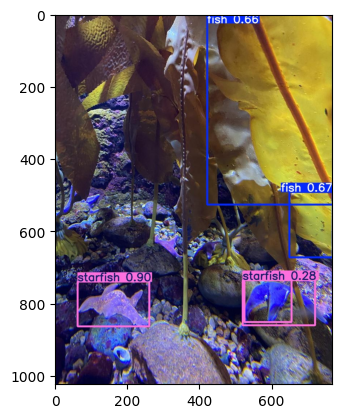

In [31]:
# Process results list
result.save(filename=f"result.jpg")  # save to disk

image = Image.open("result.jpg")
plt.imshow(image)
